In [1]:
# Required imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load the Data Into a Pandas DataFrame

In [2]:
# Read in the CSV file as a Pandas Dataframe
ccinfo_default_df = pd.read_csv("Resources/ccinfo_transformed.csv")
# Show the DataFrame.
ccinfo_default_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary,customer_segments
0,-1.117341,1,24,-0.660703,-0.542779,1,0,0,0,1,2
1,-0.349942,0,26,-0.636370,-0.463994,1,0,0,0,1,2
2,-0.580162,0,34,-0.416808,-0.354013,0,0,0,0,1,0
3,-0.887121,1,37,-0.080152,-0.402077,0,0,0,0,1,0
4,-0.887121,1,57,-0.396855,0.523771,0,0,0,0,1,1


<Axes: xlabel='limit_bal', ylabel='age'>

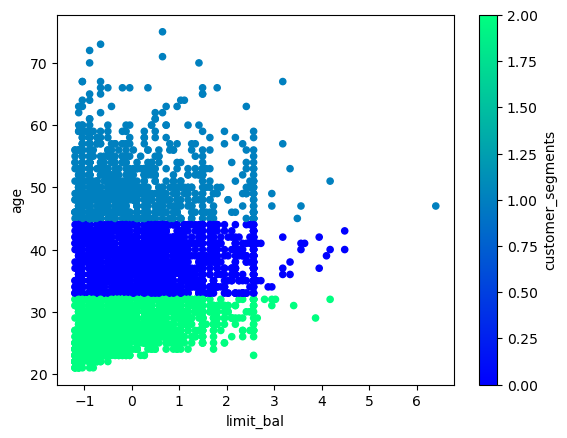

In [3]:
# Plot the clusters using the "limit_bal" and "age" columns
ccinfo_default_df.plot.scatter(
    x="limit_bal",
    y="age",
    c="customer_segments",
    colormap='winter')

<Axes: xlabel='bill_amt', ylabel='pay_amt'>

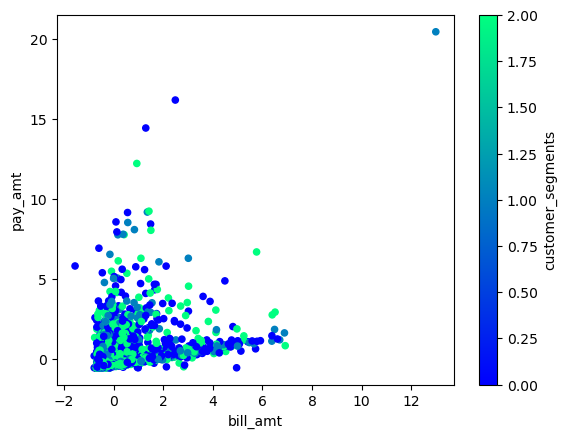

In [4]:
# Plot the clusters using the "bill_amt" and "pay_amt" columns
ccinfo_default_df.plot.scatter(
    x="bill_amt",
    y="pay_amt",
    c="customer_segments",
    colormap='winter')

## Normalize and Transform the Data

In [5]:
# Drop the customer_segments column so it isn't considered a feature. 
cc_df_clean = ccinfo_default_df.drop(['customer_segments'], axis=1)
cc_df_clean.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,-1.117341,1,24,-0.660703,-0.542779,1,0,0,0,1
1,-0.349942,0,26,-0.636370,-0.463994,1,0,0,0,1
2,-0.580162,0,34,-0.416808,-0.354013,0,0,0,0,1
3,-0.887121,1,37,-0.080152,-0.402077,0,0,0,0,1
4,-0.887121,1,57,-0.396855,0.523771,0,0,0,0,1


In [6]:
# Import the PCA module
from sklearn.decomposition import PCA

In [7]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)

In [8]:
# Fit the PCA model on the transformed credit card DataFrame
ccinfo_pca = pca.fit_transform(cc_df_clean)

# Review the first 5 rows of list data
ccinfo_pca[:5]

array([[-11.37730727,  -1.17537801],
       [ -9.3885373 ,  -0.72756683],
       [ -1.39588756,  -0.78857801],
       [  1.62350575,  -0.84822309],
       [ 21.61671552,  -0.84767395]])

## Get the Variance of Each Component

In [9]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.95609968, 0.01907234])

## Creating the PCA DataFrame

In [10]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
ccinfo_pca_df.head(10)

,PCA1,PCA2
0,-11.377307,-1.175378
1,-9.388537,-0.727567
2,-1.395888,-0.788578
3,1.623506,-0.848223
4,21.616716,-0.847674
5,1.598600,-0.749019
6,-6.263217,6.841229
7,-12.390534,-0.732948
8,-7.347906,-0.542217
9,-0.392949,-1.189718


## Determine the Optimal `k` Value

In [11]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(ccinfo_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,438255.349641
1,2,141755.819448
2,3,72200.790486
3,4,48545.260496
4,5,34913.408105


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

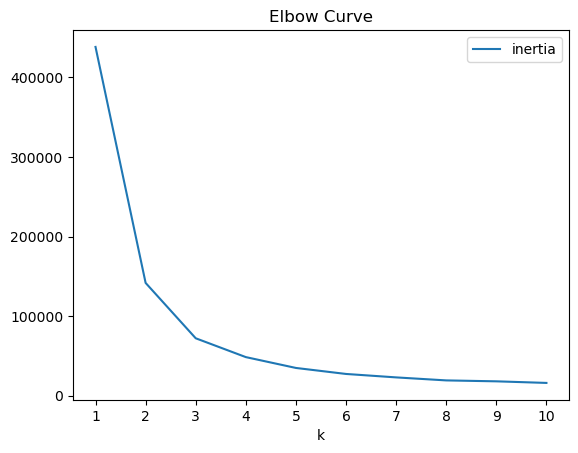

In [12]:
# Plot the Elbow Curve
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [13]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 67.65%
Percentage decrease from k=2 to k=3: 49.07%
Percentage decrease from k=3 to k=4: 32.76%
Percentage decrease from k=4 to k=5: 28.08%
Percentage decrease from k=5 to k=6: 21.61%
Percentage decrease from k=6 to k=7: 15.78%
Percentage decrease from k=7 to k=8: 16.40%
Percentage decrease from k=8 to k=9: 6.03%
Percentage decrease from k=9 to k=10: 11.06%


## Segmentation of the PCA data with K-means 

In [14]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=0)

# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_3 = model.predict(ccinfo_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["customer_segments"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

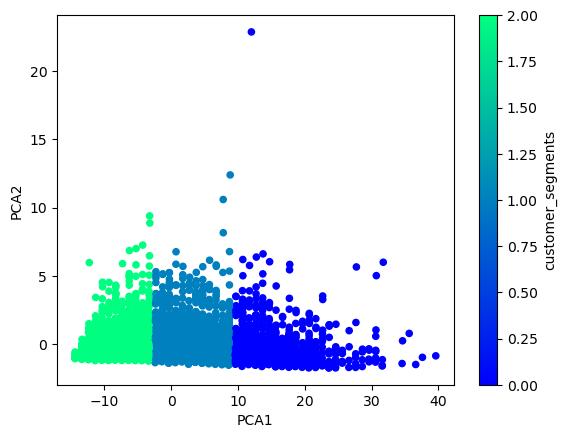

In [15]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

In [16]:
# What columns contribute the most to the explained variance?
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.95609968, 0.01907234])

In [17]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=cc_df_clean.columns)
pca_component_weights

,PCA1,PCA2
limit_bal,0.018011,0.572246
marriage,0.024665,0.014226
age,0.999408,-0.018770
bill_amt,0.007166,0.554670
pay_amt,0.007905,0.595801
default,0.000911,-0.033582
other,0.000050,0.000906
post-grad,0.009507,-0.037915
primary,-0.004917,0.073692
secondary,-0.004640,-0.036682


### Which features have the strongest influence on each component?
---

- "age" has the strongest influence on PCA1 at 99.9% and probably has the biggest influence on segmenting the data.
- "limit_bal", "bill_amt", and "pay_amt" have the strongest influence on PCA2 at 57%, 55%, and 60%. 
-  Based on these results, our original graph of using the "limit_bal" and "age" before applying PCA may be good enough to segment the data. Similar results would have been achieved for "bill_amt" and "age", and "pay_amt" and "age". 